# Use OSMnx to get street networks by place name

Author: [Geoff Boeing](https://geoffboeing.com/)

  - [Overview of OSMnx](http://geoffboeing.com/2016/11/osmnx-python-street-networks/)
  - [GitHub repo](https://github.com/gboeing/osmnx)
  - [Examples, demos, tutorials](https://github.com/gboeing/osmnx-examples)
  - [Documentation](https://osmnx.readthedocs.io/en/stable/)
  - [Journal article/citation](http://geoffboeing.com/publications/osmnx-complex-street-networks/)
  
Once you've perused the features demo and overview notebooks, this notebook provides further demonstration of querying by place name with OSMnx.

In [1]:
import osmnx as ox

%matplotlib inline
ox.__version__

'1.6.0'

OSMnx lets you download street network data and build topologically corrected multidigraphs, project to UTM and plot the networks, and save the street network as SVGs, GraphML files, or GeoPackages for later use. The street networks are directed and preserve one-way directionality. API responses can be cached locally so OSMnx doesn't have to request the same data from the API multiple times: saving bandwidth, increasing speed, and enabling reproducibility.

You can download a street network by providing OSMnx any of the following:
  - a bounding box
  - a lat-long point plus a distance (either distance along the network, or cardinal)
  - an address plus a distance (either distance along the network, or cardinal)
  - a place name or list of place names (for OSMnx to automatically geocode and get the boundary of)
  - a polygon of the desired street network's boundaries

You can also specify several different built-in network types:
  - `drive` - get drivable public streets (but not service roads)
  - `drive_service` - get drivable streets, including service roads
  - `walk` - get all streets and paths that pedestrians can use (this network type ignores one-way directionality)
  - `bike` - get all streets and paths that cyclists can use
  - `all` - download all non-private OSM streets and paths
  - `all_private` - download all OSM streets and paths, including private-access ones

Or you can define your own fine-tuned network type using OSMnx's `custom_filter` parameter (to get just highways, or railways, canals, etc).

## 1. Query/download place boundaries

The `graph_from_place` function uses place boundary geocoding logic to find the network within your place's boundary. Let's look briefly at this place boundary querying before we get to street networks. You can download by cities, neighborhoods, boroughs, counties, states, or countries: anything with geocodable polygon boundaries in OSM's database. Notice the polygon geometries represent political boundaries, not physical/land boundaries. OSMnx will turn your geocoded place (or multiple places) boundaries into a geopandas GeoDataFrame.

In [ ]:
# neighborhoods or boroughs
gdf = ox.geocode_to_gdf("Manhattan, New York, New York, USA")

# counties
gdf = ox.geocode_to_gdf("Cook County, Illinois, United States")

# states
gdf = ox.geocode_to_gdf("Iowa")

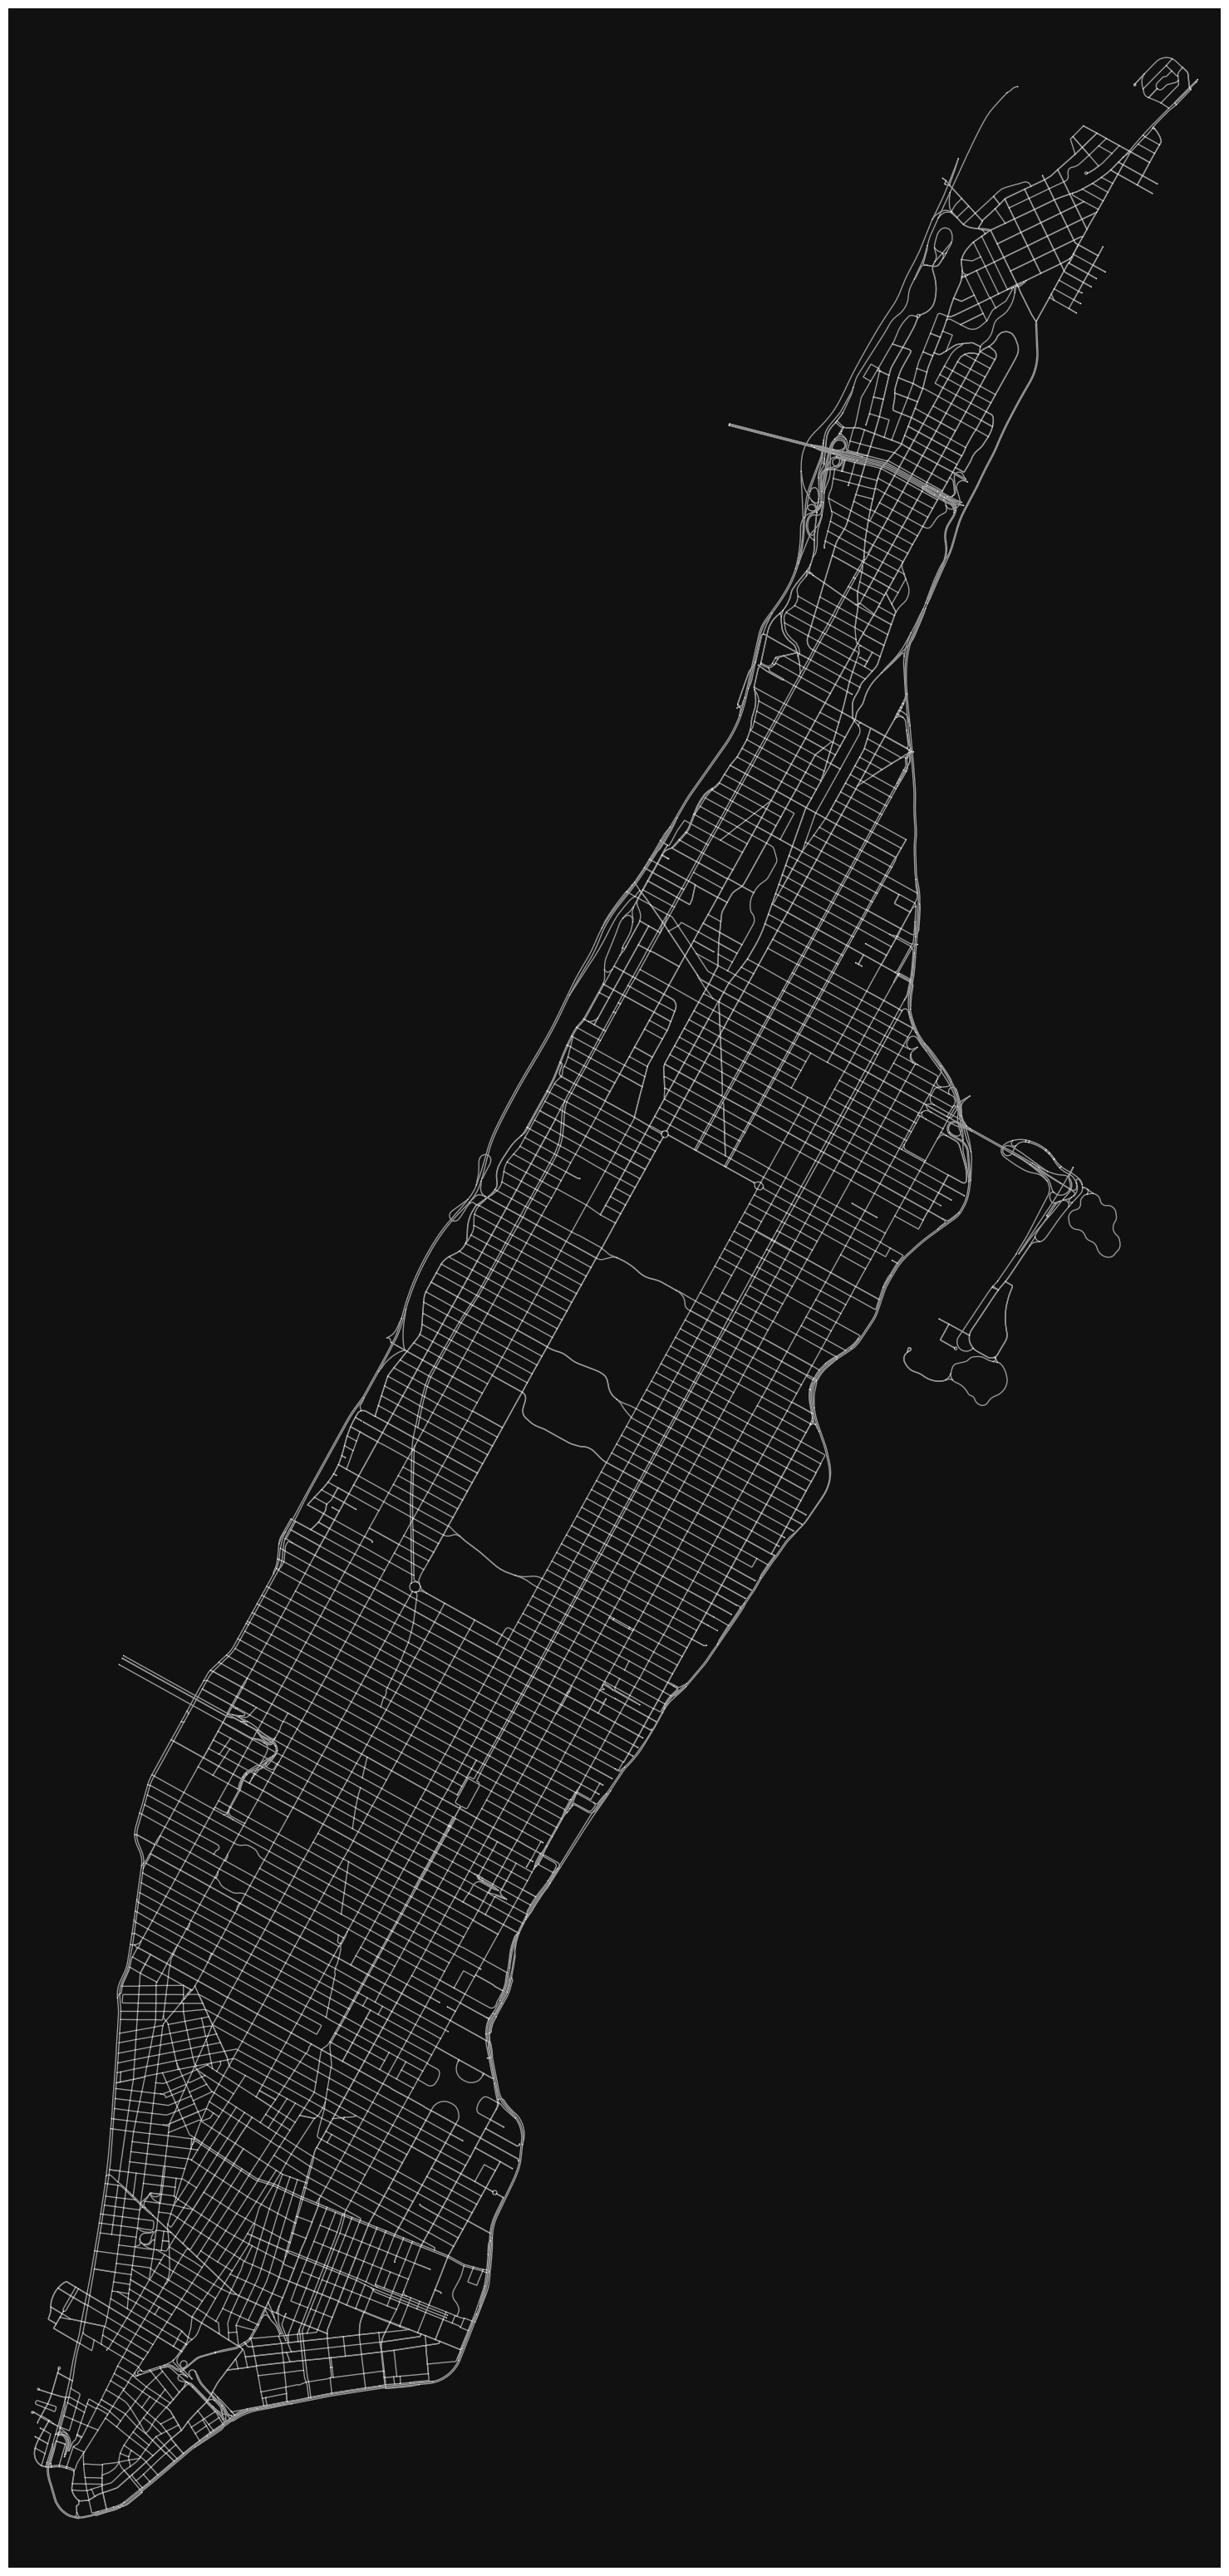

In [7]:
# gdf = ox.geocode_to_gdf("Manhattan, New York, New York, USA")
G = ox.graph_from_place("Manhattan, New York, New York, USA", network_type="drive")
fig, ax = ox.plot_graph(G,figsize=(40,40),node_size=1)

In [11]:
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)
gdf_nodes.head(10)

,y,x,highway,street_count,ref,geometry
osmid,,,,,,
42421728,40.798048,-73.960044,traffic_signals,3,NaN,POINT (-73.96004 40.79805)
42421731,40.798654,-73.961474,traffic_signals,4,NaN,POINT (-73.96147 40.79865)
42421737,40.799244,-73.962873,traffic_signals,4,NaN,POINT (-73.96287 40.79924)
42421741,40.800429,-73.965691,traffic_signals,4,NaN,POINT (-73.96569 40.80043)
42421745,40.801398,-73.967996,traffic_signals,4,NaN,POINT (-73.96800 40.80140)
42421749,40.801645,-73.968574,traffic_signals,4,NaN,POINT (-73.96857 40.80165)
42421751,40.802268,-73.970050,NaN,3,NaN,POINT (-73.97005 40.80227)
42421769,40.782638,-73.975007,traffic_signals,3,NaN,POINT (-73.97501 40.78264)
42421772,40.783828,-73.977825,traffic_signals,4,NaN,POINT (-73.97783 40.78383)


In [14]:
gdf_edges.head(50)

osmid               name  \
u        v          key                                                         
42421728 42432736   0                            195743153  Central Park West   
         42435337   0                            195743153  Central Park West   
         42421731   0      [420625565, 420625573, 5668966]  West 106th Street   
42421731 42437916   0                              5671485   Manhattan Avenue   
         42432737   0                            195743186   Manhattan Avenue   
         42421728   0      [420625565, 5668966, 420625573]  West 106th Street   
         42421737   0               [195743201, 420625570]  West 106th Street   
42421737 42421731   0               [195743201, 420625570]  West 106th Street   
         42437917   0                            420625563    Columbus Avenue   
         42421741   0                            420625567  West 106th Street   
42421741 42432756   0               [957050578, 196116970]   Amsterdam Avenue   
         1061531654 0    [420625569, 196117060, 420625564]  West 106th Street   
         42421737   0                            420625567  West 106th Street   
42421745 1061531654 0                            195743200  West 106th Street   
         42421749   0                [420625568, 68674963]  West 106th Street   
         42428751   0                            196116982           Broadway   
42421749 42421751   0                             46563041  West 106th Street   
         42421745   0                [420625568, 68674963]  West 106th Street   
         42431118   0              [945966226, 1029634742]    West End Avenue   
42421751 42432764   0                            945966227    Riverside Drive   
         42421749   0                             46563041  West 106th Street   
42421769 42443347   0                            195743159    Columbus Avenue   
42421772 42421769   0                              5668968   West 80th Street   
         42442469   0              [1025731514, 195743132]   Amsterdam Avenue   
42421775 1061531525 0                              5668968   West 80th Street   
         42428653   0                            404253364           Broadway   
42421776 42421775   0                              5668968   West 80th Street   
         42431024   0               [837696056, 837696054]    West End Avenue   
         42431019   0               [837696052, 837696055]    West End Avenue   
42421778 42421776   0                              5668968   West 80th Street   
         42422592   0                [763299975, 46111607]    Riverside Drive   
         42441587   0                             46111607    Riverside Drive   
42421783 42443522   0                 [5672050, 164839573]       Nagle Avenue   
         42427782   0                 [104984000, 5672430]     Bennett Avenue   
         42429174   0                            962669696           Broadway   
         8904913030 0               [962669697, 962669695]           Broadway   
42421785 42421786   0                              5668973    Hillside Avenue   
         42443520   0                              5671285     Bogardus Place   
42421786 42421791   0                              5668973    Hillside Avenue   
42421791 4814440062 0                              5668973    Hillside Avenue   
         42448930   0                              5671645     Sickles Street   
42421800 42424851   0                            542215780  Central Park West   
         42435308   0                            542215780  Central Park West   
42421803 42437300   0                            421853639    Columbus Avenue   
         42421800   0                            542216919   West 84th Street   
42421806 42421803   0                              5668977   West 84th Street   
         42442475   0                            740085321   Amsterdam Avenue   
42421809 1061531683 0                              5668977   West 84th Street   
   

In [ ]:
# you can get multiple countries in a single query
gdf = ox.geocode_to_gdf(["United Kingdom", "Ireland"])

# or multiple cities
places = [
    "Berkeley, California, USA",
    "Oakland, California, USA",
    "Piedmont, California, USA",
    "Emeryville, California, USA",
    "Alameda, Alameda County, CA, USA",
]
gdf = ox.geocode_to_gdf(places)

The `geocode_to_gdf` function takes a `which_result` argument. Its default value `None` makes OSMnx retrieve the first result with geometry type Polygon/MultiPolygon (if one exists on OSM). Alternatively, pass an integer value as `which_result` to retrieve a specific geocoding result, regardless of its geometry type.

When querying, be specific and explicit, and sanity check the results. Try passing a dict instead of a string to be more explicit.

In [ ]:
# oops, this gets the county of alameda rather than the city!
alameda1 = ox.geocode_to_gdf("Alameda, California, USA")

# this gets the city of alameda
alameda2 = ox.geocode_to_gdf(
    {
        "city": "Alameda",
        "county": "Alameda County",
        "state": "California",
        "country": "USA",
    }
)

# the city is a very small part of the county
alameda1 = ox.project_gdf(alameda1)
alameda2 = ox.project_gdf(alameda2)
alameda2.area.iloc[0] / alameda1.area.iloc[0]

OSM resolves 'Mexico' to Mexico City (as the first geocoding result) and returns a single point at the center of the city. If we want the boundaries of the country of Mexico, we can 1) specify which_result=None to find the first polygon and hope it's the country, or 2) pass a dict containing a structured query to specify that we want Mexico the country instead of Mexico the city.

In [ ]:
mexico = ox.geocode_to_gdf("Mexico", which_result=2)
type(mexico["geometry"].iloc[0])

In [ ]:
# let the geocoder find the first Polygon/MultiPolygon result
mexico = ox.geocode_to_gdf("Mexico", which_result=None)
type(mexico["geometry"].iloc[0])

In [ ]:
# instead of a string, you can pass a dict containing a structured query for better precision
mexico = ox.geocode_to_gdf({"country": "Mexico"})
type(mexico["geometry"].iloc[0])

In [ ]:
# you can pass multiple queries with mixed types (dicts and strings)
mx_gt_tx = ox.geocode_to_gdf([{"country": "Mexico"}, "Guatemala", {"state": "Texas"}])
mx_gt_tx = ox.project_gdf(mx_gt_tx)
ax = mx_gt_tx.plot(fc="gray", ec="w")
_ = ax.axis("off")

If you query 'France', OSM returns the country with all its overseas territories as result 1 and Metropolitan France alone as later down the results. Passing `which_result` can help you specifically retrieve the desired geocoding result, or you can query the geospatial feature you want by its OSM ID.

In [ ]:
france = ox.geocode_to_gdf("France")
france = ox.project_gdf(france)
ax = france.plot(fc="gray", ec="none")
_ = ax.axis("off")

In [ ]:
france = ox.project_gdf(ox.geocode_to_gdf("R1403916", by_osmid=True))
ax = france.plot(fc="gray", ec="none")
_ = ax.axis("off")

Finally, note that you can also query by OSM ID rather than place name by passing `by_osmid=True` to the function. See documentation for usage details.

## 2. Get street networks by place name

This "by place" querying logic works the same as the place boundary querying we just saw above.

In [ ]:
# get the walking network for piedmont
G = ox.graph_from_place("Piedmont, California, USA", network_type="walk")

In [ ]:
# or get the walking network within a 500 meter buffer of piedmont
polygon = ox.geocode_to_gdf("Piedmont, California, USA").loc[0, "geometry"]
poly_proj, crs_proj = ox.projection.project_geometry(polygon)
polygon, _ = ox.projection.project_geometry(poly_proj.buffer(500), crs=crs_proj, to_latlong=True)
G = ox.graph_from_polygon(polygon, network_type="walk")

In [ ]:
# create a network from multiple places
places = [
    "Piedmont, California, USA",
    {"city": "Berkeley", "state": "California"},
    "Emeryville, California, USA",
]

# use retain_all to keep all disconnected subgraphs (e.g. if your places aren't contiguous)
G = ox.graph_from_place(places, network_type="drive", retain_all=True)
fig, ax = ox.plot_graph(G, node_size=0, edge_color="#FFFF5C", edge_linewidth=0.25)

In [ ]:
# or create a network from structured place queries
places = [
    {"city": "Daly City", "state": "California"},
    {"city": "South San Francisco", "state": "California"},
]
G = ox.graph_from_place(places, network_type="drive")

In [ ]:
# get the network for the borough of manhattan
G = ox.graph_from_place("Manhattan, New York, New York, USA", network_type="drive")

In [ ]:
# get the network for a neighborhood
place = "SoHo, New York, NY"
G = ox.graph_from_place(place, network_type="drive")

In [ ]:
%%time
# get the network for all of LA
# takes a couple minutes to do all the downloading and processing
place = "Los Angeles, California, USA"
G = ox.graph_from_place(place, network_type="drive", simplify=False, retain_all=True)

In [ ]:
# create a network constrained to the shape of hong kong island
G = ox.graph_from_place("Hong Kong Island", network_type="drive")